# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [35]:
#initialization cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('seaborn')

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

In [14]:
#slope:
def calc_slope(xs,ys):
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)
    mean_xy = np.mean(xs*ys)
    mean_x_squared = np.mean(xs*xs)
    return (((mean_x*mean_y)-mean_xy)/(mean_x**2-mean_x_squared))
    pass

In [16]:
#intercept/best_fit:
def best_fit(xs,ys):
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)
    m_hat = calc_slope(xs,ys)
    c_hat = mean_y-(m_hat*mean_x)
    return (m_hat,c_hat)
    pass
m, c = best_fit(X,Y)

0.5575757575757568 6.3333333333333375


In [17]:
#prediction:
def reg_line (m, c, xs):
    return np.array([(m*x)+c for x in xs])
    pass
regression_line = reg_line(m,c,X)

In [18]:
#r-squared:
def sq_err(y_a, y_b):
    return sum([((a-b)**2) for a in y_a for b in y_b][::len(y_a)+1])
    pass
def r_squared(y_real, y_predicted):
    y_mean = list(map(lambda real_val: np.mean(y_real),y_real))
    num = (sq_err(y_real,y_predicted))
    denom = sq_err(y_real,y_mean)
    return 1-(num/denom)
    pass
rsquared = r_squared(Y,regression_line)

I could have just moved the files and imported the functions, but for this lab, copy pasting the functions is how I decided to do it.

In [22]:
print('Slope: ', round(m,2))
print('Y-Intercept: ', round(c,2))
print('R-Squared: ', round(rsquared, 2))

Slope:  0.56
Y-Intercept:  6.33
R-Squared:  0.97


So now I have an equation to model the data of the form:
f(x) = 0.56*x + 6.33

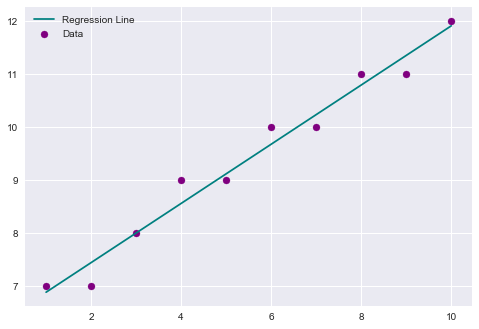

In [27]:
plt.scatter(X,Y, c='purple', label='Data')
plt.plot(X,regression_line, c='teal', label='Regression Line')
plt.legend()
plt.show()

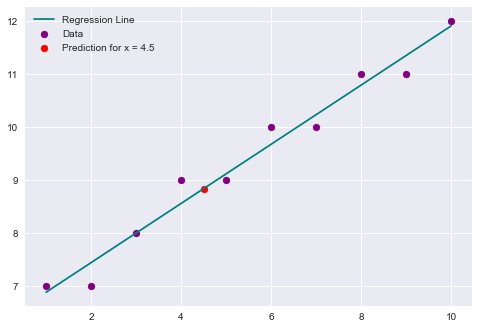

In [34]:
# Make prediction for x = 4.5 and visualize on the scatter plot
y_pred = 4.5*m+c
plt.scatter(X,Y, c='purple', label='Data')
plt.plot(X,regression_line, c='teal', label='Regression Line')
plt.scatter(x=4.5,y=y_pred,c='red', label= 'Prediction for x = 4.5')
plt.legend()
plt.show()


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


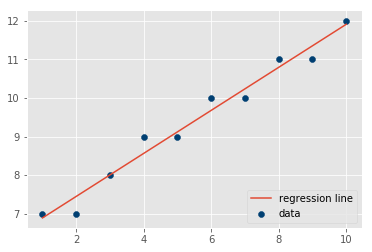

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

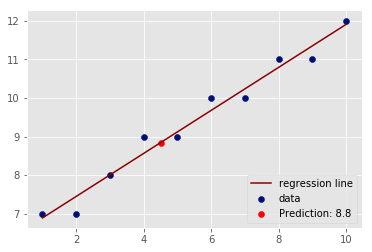

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [37]:
df = pd.read_csv('heightWeight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [41]:
height = df['height']
weight = df['weight']

hw_m, hw_c = best_fit(height,weight)
hw_regression_line = reg_line(hw_m,hw_c,height)
hw_rsquared = r_squared(weight,hw_regression_line)

print('Slope: ', round(hw_m,2))
print('Y-Intercept: ', round(hw_c,2))
print('R-Squared: ', round(hw_rsquared, 2))

Slope:  5.54
Y-Intercept:  -204.48
R-Squared:  0.96


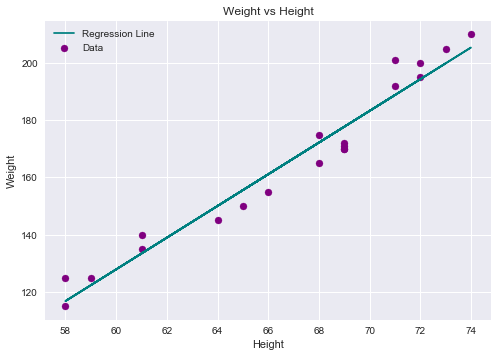

In [43]:
plt.scatter(height,weight, c='purple', label='Data')
plt.plot(height,hw_regression_line, c='teal', label='Regression Line')
plt.title('Weight vs Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()